### Carregamento das bibliotecas

In [1]:
# pacotes padrao
import os, sys, types, time, datetime, math, random, unidecode, collections, re

# Para nuvem de palavras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Manipulacao de dados
import numpy as np
import pandas as pd

# Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Lidando com Warnings 
import warnings
warnings.filterwarnings('ignore')

# plotagem Inline
%matplotlib inline

from crod_utils import *

### Seleção dos dados

Para o desenvolvimento e validação do modelo preditivo proposto nesse trabalho, utilizamos dados anonimizados coletados do estado do Rio Grande do Sul, através do [Painel Corona Vírus RS](https://ti.saude.rs.gov.br/covid19/), e compreende o perído de 01/01/2021 a 08/06/2021. 

In [2]:
df = pd.read_csv("files/20210608_Ano2021.csv", sep=';')

___
# II. Preparação dos dados

**Definição** (ões): 

Em um projeto de modelagem preditiva (*machine learning*), como classificação ou regressão, os dados brutos (*raw data*) geralmente não podem ser usados diretamente.

Assim, os dados brutos devem ser pré-processados antes de serem usados para treinar e avaliar um modelo de aprendizado de máquina. Esta etapa em um projeto de modelagem preditiva é conhecida como "preparação de dados" (*data preparation*), embora tenha muitos outros termos, como "*data wrangling*", "limpeza de dados" (*data cleaning*), "pré-processamento de dados" (*data pre-processing*)  e "engenharia de recursos" (*feature engineering*). Alguns desses nomes podem se encaixar melhor como subtarefas para o processo mais amplo de preparação de dados.


Podemos definir a **preparação de dados** como a transformação de dados brutos em uma forma mais adequada para modelagem.

"*Data wrangling, which is also commonly referred to as data munging, transformation, manipulation, janitor work, etc., can be a painstakingly laborious process.*"

Página 5, [Data Wrangling with R, 2016](https://www.amazon.com/Data-Wrangling-R-Use/dp/3319455982/ref=as_li_ss_tl?dchild=1&keywords=data+wrangling&qid=1588630112&s=books&sr=1-1&linkCode=sl1&tag=inspiredalgor-20&linkId=7de9e8ee2c934be3fc81fcd6f711cd9b&language=en_US)



**Data preparation* (do inglês) pode ser um dos passos mais difíceis em um projeto de *machine learning*.**

O motivo é que cada conjunto de dados é diferente e altamente específico para o projeto. No entanto, existem semelhanças suficientes entre os projetos de modelagem preditiva que podemos definir uma sequência flexível de etapas, ou subtarefas, que aplicaremos nesse projeto.
Este processo fornece um contexto no qual podemos considerar a preparação de dados necessária para o projeto, informada tanto pela definição do projeto realizada antes da preparação dos dados, quanto pela avaliação dos algoritmos de aprendizado de máquina realizada posteriormente.

"*the right features can only be defined in the context of both the model and the data; since data and models are so diverse, it’s difficult to generalize the practice of feature engineering across projects.*"

— Página 7, [Feature Engineering for Machine Learning, 2018.](https://www.amazon.com/Feature-Engineering-Machine-Learning-Principles/dp/1491953241/ref=as_li_ss_tl?_encoding=UTF8&qid=1588723968&sr=1-1&linkCode=sl1&tag=inspiredalgor-20&linkId=3e614a0a3ccc56cc6f4c2b4f0a1e1ae8&language=en_US)

"*Data pre-processing techniques generally refer to the addition, deletion, or transformation of training set data.*"

— Página 27, [Applied Predictive Modeling, 2013].(https://www.amazon.com/Applied-Predictive-Modeling-Max-Kuhn/dp/1461468485/ref=as_li_ss_tl?dchild=1&keywords=Applied+Predictive+Modeling&qid=1588722749&s=books&sr=1-1&linkCode=sl1&tag=inspiredalgor-20&linkId=45aa03c24c87a9e32f5611baa5e287ff&language=en_US)

**Etapas e subetapas**:

Dentro dessa etapa, vamos explorar 5 sub-etapas, não exaustivas, que incluem:


 - **1. Limpeza de dados (*data cleaning*):** Identificar e corrigir alguns erros nos dados
 - **2. Seleção das características (*feature selection*):** Considerar quais dados são mais relevantes para resolver o problema
 - **3. Transformação dos dados (*data trasformation*):** Mudar escalas ou distribuições das variáveis (não se aplica no nosso contexto)
 - **4. Engenharia de características (*feature engineering*):** Derivar (extrair) novas características a partir dos dados disponíveis
 - **5. Redução de dimensionalidade (*dimensionality reduction*):** Criação de projeções mais compactas dos dados
 
 ---

## 1. Limpeza de dados

Vamos dividir essa etapa em 2:
 - 1.1. Análise exploratória
 - 1.2. Pre-processamento dos dados

### 1.1 Análise exploratória

#### 1.1.1 Dimensões

In [3]:
print_df_dimensions(df)

DIMENSÕES DO DATAFRAME:
Linhas:		604389
Colunas:	30


O conjunto original dos dados, contém 30 dados sobre cada paciente, incluindo dados demograficos e fisiológicos.

#### 1.1.2 Visualização das 5 primeiras entradas e da descrição dos dados

Visualizar primeiras 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [4]:
df.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Masculino,50 a 59,RT-PCR,15/03/2021,11/03/2021,24/03/2021,...,NaN,25/03/2021,PARDA,NAO ENCONTRADO,NAO,JARDIM DA SERRA,NAO,E-SUS,BRASIL,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Masculino,<1,RT-PCR,17/03/2021,15/03/2021,24/03/2021,...,NaN,29/03/2021,PARDA,NaN,NAO,JARDIM DA SERRA,NAO,E-SUS,NaN,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,30 a 39,RT-PCR,17/03/2021,14/03/2021,24/03/2021,...,NaN,28/03/2021,PARDA,NAO ENCONTRADO,NAO,JARDIM DA SERRA,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Masculino,40 a 49,TESTE RÁPIDO,24/05/2021,19/05/2021,04/06/2021,...,NaN,NaN,PARDA,NAO ENCONTRADO,NAO INFORMADO,TABUA,SIM,SIVEP HOSP,BRASIL,NAO
4,430003,ACEGUÁ,16,BAGE - R22,Feminino,40 a 49,TESTE RÁPIDO,31/05/2021,31/05/2021,08/06/2021,...,NaN,NaN,BRANCA,NaN,NAO INFORMADO,ZR,SIM,SIVEP HOSP,NaN,NAO


In [5]:
df.describe(include=['O'])

,MUNICIPIO,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,DATA_EVOLUCAO,EVOLUCAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
count,604389,604389,604389,604389,604389,604389,604389,604389,44684,604389,...,18580,544143,604389,586422,604389,604379,604389,604389,586422,604389
unique,497,21,2,12,8,272,158,169,158,4,...,154,144,6,20,3,24190,2,3,64,2
top,PORTO ALEGRE,PORTO ALEGRE - R10,Feminino,30 a 39,TESTE RÁPIDO,01/03/2021,01/03/2021,27/03/2021,15/03/2021,RECUPERADO,...,16/03/2021,15/03/2021,BRANCA,NAO ENCONTRADO,NAO,CENTRO,NAO,E-SUS,BRASIL,NAO
freq,54014,81652,320193,126142,308846,14045,13464,11211,737,568066,...,500,12265,437269,586034,538490,102811,549258,546840,576841,603891


In [6]:
df.columns

Index(['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID', 'SEXO',
       'FAIXAETARIA', 'CRITERIO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS',
       'DATA_INCLUSAO', 'DATA_EVOLUCAO', 'EVOLUCAO', 'HOSPITALIZADO', 'FEBRE',
       'TOSSE', 'GARGANTA', 'DISPNEIA', 'OUTROS', 'CONDICOES', 'GESTANTE',
       'DATA_INCLUSAO_OBITO', 'DATA_EVOLUCAO_ESTIMADA', 'RACA_COR',
       'ETNIA_INDIGENA', 'PROFISSIONAL_SAUDE', 'BAIRRO', 'SRAG',
       'FONTE_INFORMACAO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE'],
      dtype='object')

In [7]:
df.columns

Index(['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID', 'SEXO',
       'FAIXAETARIA', 'CRITERIO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS',
       'DATA_INCLUSAO', 'DATA_EVOLUCAO', 'EVOLUCAO', 'HOSPITALIZADO', 'FEBRE',
       'TOSSE', 'GARGANTA', 'DISPNEIA', 'OUTROS', 'CONDICOES', 'GESTANTE',
       'DATA_INCLUSAO_OBITO', 'DATA_EVOLUCAO_ESTIMADA', 'RACA_COR',
       'ETNIA_INDIGENA', 'PROFISSIONAL_SAUDE', 'BAIRRO', 'SRAG',
       'FONTE_INFORMACAO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE'],
      dtype='object')

#### 1.1.3 Tipo das variáveis

In [8]:
df.dtypes

COD_IBGE                   int64
MUNICIPIO                 object
COD_REGIAO_COVID           int64
REGIAO_COVID              object
SEXO                      object
FAIXAETARIA               object
CRITERIO                  object
DATA_CONFIRMACAO          object
DATA_SINTOMAS             object
DATA_INCLUSAO             object
DATA_EVOLUCAO             object
EVOLUCAO                  object
HOSPITALIZADO             object
FEBRE                     object
TOSSE                     object
GARGANTA                  object
DISPNEIA                  object
OUTROS                    object
CONDICOES                 object
GESTANTE                  object
DATA_INCLUSAO_OBITO       object
DATA_EVOLUCAO_ESTIMADA    object
RACA_COR                  object
ETNIA_INDIGENA            object
PROFISSIONAL_SAUDE        object
BAIRRO                    object
SRAG                      object
FONTE_INFORMACAO          object
PAIS_NASCIMENTO           object
PES_PRIV_LIBERDADE        object
dtype: obj

#### 1.1.4 Conclusões iniciais sobre os dados

 - Existem colunas contendo códigos que não nos são uteis, como código do IBGE (`COD_IBGE`) e código da região do covid (`COD_REGIAO_COVID`), assim como coluna `REGIAO_COVID` que nao possui informação relevante.
 - Existe coluna sobre a informação se o paciente era profissional da saúde, que não possui informação relevante
 - A variável alvo para analisar a chance de óbito esta na coluna `EVOLUCAO`.
 - Colunas como `PES_PRIV_LIBERDADE` e `PAIS_NASCIMENTO` e as contendo datas não possuem informações importantes
 - A coluna `CONDICOES` possui informações sobre outras condições em modo texto
 - `FONTE_INFORMACAO` não é informação relevante

#### 1.1.5 Valores faltantes

In [9]:
print(df.isnull().sum().sort_values(ascending=False))

DATA_INCLUSAO_OBITO       585809
DATA_EVOLUCAO             559705
CONDICOES                 521903
DATA_EVOLUCAO_ESTIMADA     60246
PAIS_NASCIMENTO            17967
ETNIA_INDIGENA             17967
DISPNEIA                    2418
BAIRRO                        10
DATA_SINTOMAS                  0
DATA_CONFIRMACAO               0
CRITERIO                       0
PES_PRIV_LIBERDADE             0
FAIXAETARIA                    0
SEXO                           0
REGIAO_COVID                   0
COD_REGIAO_COVID               0
MUNICIPIO                      0
DATA_INCLUSAO                  0
TOSSE                          0
EVOLUCAO                       0
HOSPITALIZADO                  0
FEBRE                          0
GARGANTA                       0
OUTROS                         0
GESTANTE                       0
RACA_COR                       0
PROFISSIONAL_SAUDE             0
SRAG                           0
FONTE_INFORMACAO               0
COD_IBGE                       0
dtype: int

In [10]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)

DATA_INCLUSAO_OBITO       96.925821
DATA_EVOLUCAO             92.606748
CONDICOES                 86.352167
DATA_EVOLUCAO_ESTIMADA     9.968083
PAIS_NASCIMENTO            2.972754
ETNIA_INDIGENA             2.972754
DISPNEIA                   0.400073
BAIRRO                     0.001655
DATA_SINTOMAS              0.000000
DATA_CONFIRMACAO           0.000000
CRITERIO                   0.000000
PES_PRIV_LIBERDADE         0.000000
FAIXAETARIA                0.000000
SEXO                       0.000000
REGIAO_COVID               0.000000
COD_REGIAO_COVID           0.000000
MUNICIPIO                  0.000000
DATA_INCLUSAO              0.000000
TOSSE                      0.000000
EVOLUCAO                   0.000000
HOSPITALIZADO              0.000000
FEBRE                      0.000000
GARGANTA                   0.000000
OUTROS                     0.000000
GESTANTE                   0.000000
RACA_COR                   0.000000
PROFISSIONAL_SAUDE         0.000000
SRAG                       0

Dispneia possui 1.02% de dados faltantes, febre e tosse possuem apenas 0.0028% faltante. O que nos permite remover esses registros, devido a baixa proporção, o que não impactaria no conjunto geral.

Dentre o top 5 de dados faltantes: 

 - DATA_INCLUSAO_OBITO       96.92%
 - DATA_EVOLUCAO             92.60%
 - CONDICOES                 86.35%
 - DATA_EVOLUCAO_ESTIMADA    9.96.47%
 - PAIS_NASCIMENTO            2.97%
 
dentre esses, apenas as condições nos interessam, e conta apenas como extra. O restante das variáveis serão removidas, pois não agregam informação para o nosso objetivo.

#### 1.1.6 Valores possíveis para campos categóricos

In [11]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
TOSSE                         2
SRAG                          2
GESTANTE                      2
OUTROS                        2
DISPNEIA                      2
GARGANTA                      2
FEBRE                         2
HOSPITALIZADO                 2
PES_PRIV_LIBERDADE            2
SEXO                          2
FONTE_INFORMACAO              3
PROFISSIONAL_SAUDE            3
EVOLUCAO                      4
RACA_COR                      6
CRITERIO                      8
FAIXAETARIA                  12
ETNIA_INDIGENA               20
COD_REGIAO_COVID             21
REGIAO_COVID                 21
PAIS_NASCIMENTO              64
DATA_EVOLUCAO_ESTIMADA      144
DATA_INCLUSAO_OBITO         154
DATA_EVOLUCAO               158
DATA_SINTOMAS               158
DATA_INCLUSAO               169
DATA_CONFIRMACAO            272
MUNICIPIO                   497
COD_IBGE                    497
CONDICOES                   803
BAIRRO                    24190
dtype: int64


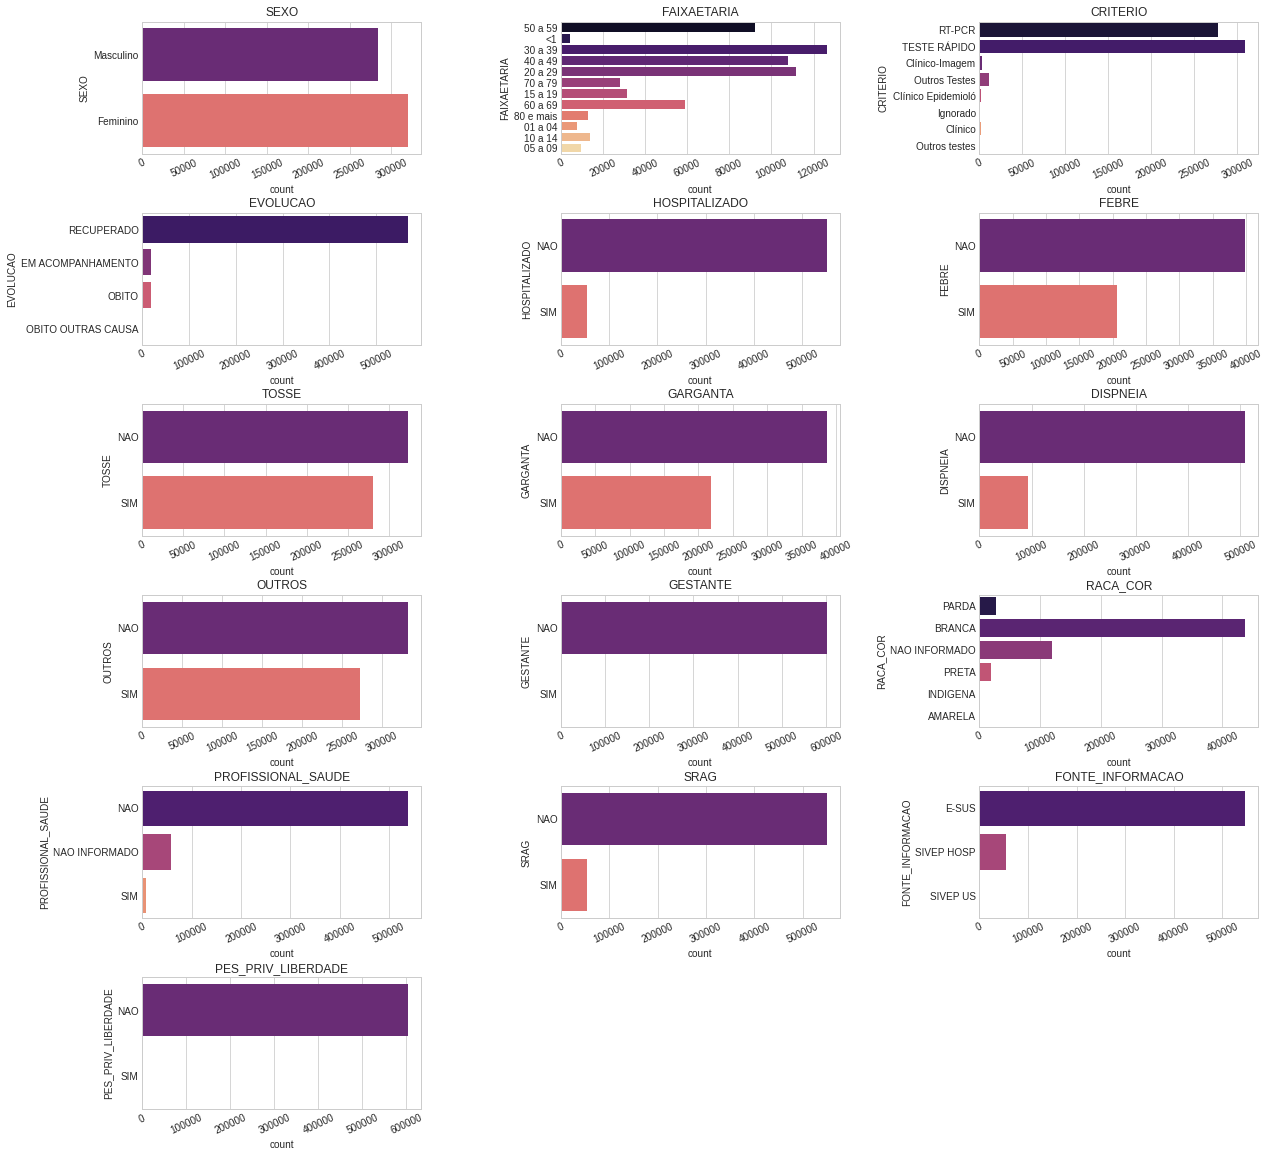

In [12]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset, palette="magma")
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df.drop(['BAIRRO', 'CONDICOES', 'COD_IBGE', 'MUNICIPIO', 'DATA_SINTOMAS', 
                           'DATA_CONFIRMACAO', 'DATA_EVOLUCAO_ESTIMADA', 'DATA_INCLUSAO',
                           'DATA_INCLUSAO_OBITO', 'PAIS_NASCIMENTO', 'DATA_EVOLUCAO', 'COD_REGIAO_COVID', 
                           'REGIAO_COVID', 'ETNIA_INDIGENA'], axis=1), 
                          cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

#### 1.1.7 Proporção de óbitos por covid no conjunto de dados

Para entendimento do nosso *outcome*, variável alvo, ou variável dependente.

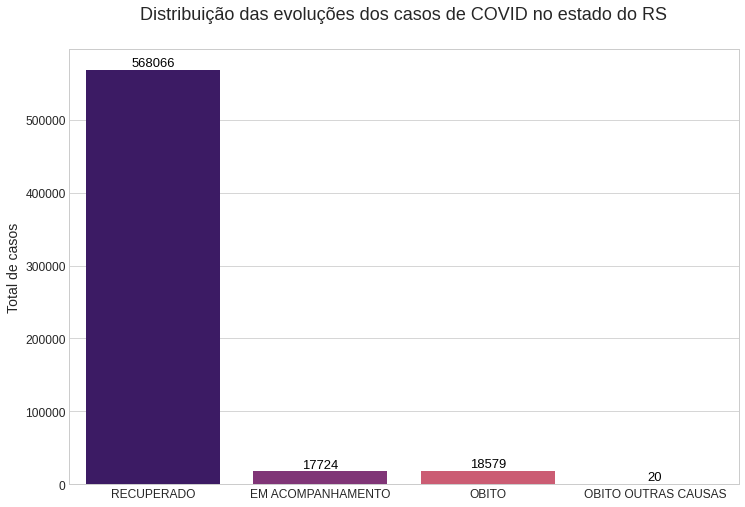

In [13]:
plt.rc('figure', figsize=(12, 8))
ax = sns.countplot(x='EVOLUCAO', data=df, palette='magma')

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 # divide por 2 pra ficar no meio
            _y = p.get_y() + p.get_height() + 5000 # mais 5000 pra n ficar colado na altura da barra
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=13, color='black',) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
show_values_on_bars(ax)

ax.set_title('Distribuição das evoluções dos casos de COVID no estado do RS', fontsize=18, pad=30);
ax.set_ylabel('Total de casos', fontsize=14)
ax.set_xlabel('')

ax.tick_params(axis='both', which='major', labelsize=12)

figure = ax.get_figure()    
figure.savefig("imgs/distribuicao.png", dpi=800);

#### 1.1.8 Conclusão da exploração dos dados

Os dados parecem já estar relativamente limpos, com exceção do campo `CONDICOES` de onde pode-se extrair mais informações. No geral, as informações que nos interessam são preenchidas apenas com "SIM" ou "NÃO", que são os campos de sintomas, como `FEBRE` (embora existam campos com NAO, sem acento). E o campo `EVOLUCAO`, que é a nossa variavel preditora. A faixa etária já está bem definida, e pode-se apenas definir a ordem de precedência de cada categoria.

Dentre o conjunto de dados, 93% dos dados são Recuperados, e apenas 1.97% é Óbito por COVID-19. Temos um problema de desbalanceamento, e precisamos tratá-lo posteriormente.

### 1.2 Pre-processamento dos dados

Depois de termos selecionado nossos dados, vamos considerar como nos vamos utiliza-los. Nesse processo de limpeza, nós vamos realmente filtrar aquilo que vamos poder trabalhar, dos dados pré-selecionados.

Três etapas comuns para processamento são formatação, limpeza e *sampling* (amostragem).

 - **1. Formatação:** os dados que selecionamos, podem estar em algum formato ruim de trabalhar, talvez com codificações ruins ou afins. Essa etapa é justamente para formatar alguns dados.
 - **2. Limpeza:** Essa etapa é para remover ou arrumar alguns dados faltantes. Talvez possa ter alguns dados faltantes, ou algumas informações que não foram coletadas ou mal reportadas. Em todo caso, devemos identificar qual a melhor estratégia para corrigir esse problema. Caso não impactem diretamente, podemos removê-las. Caso sejam sensíveis, talvez devamos preencher com os dados mais presentes naquela coluna.
 - **3. *sampling*:** Talvez tenhamos selecionado mais dados do que realmente precisamos para trabalhar. Mais dados significa mais tempo de processamento, mais poder computacional e etc. Nós queremos trabalhar com representações (amostragens) do nosso conjunto de dados que talvez possa representar o todo, e seja mais rápido de explorar e prototipar soluções do que com todo o conjunto de dados.
 
#### 1.2.1. Formatação
 
 Na verdade, não temos muito o que formatar nos nossos dados. Talvez algumas breve formatações antes de algum passo. Por isso, vamos realizar eventuais formatações antes da limpeza ou transformação propriamente dita.
 
#### 1.2.2 Limpeza

**Remoção das colunas que não utilizaremos**

Como visto na exploração dos dados, existem algumas colunas que não agregam informação com relação ao nosso objetivo (prever a chance de óbito); portanto removeremos estas colunas, e selecionaremos apenas o conjunto de dados que nos interessa.

Outro ponto, é a coluna de questão racial. Como queremos evitar comportamento racista do nosso modelo, iremos remover essa característica.


In [14]:
df_ = df.drop(columns=['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID',
                 'FONTE_INFORMACAO', 'BAIRRO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE', 
                 'PROFISSIONAL_SAUDE', 'DATA_EVOLUCAO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS', 
                 'DATA_INCLUSAO_OBITO', 'DATA_INCLUSAO',
                 'DATA_EVOLUCAO_ESTIMADA', 'ETNIA_INDIGENA', 'OUTROS'])

df_.columns

Index(['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'HOSPITALIZADO', 'FEBRE',
       'TOSSE', 'GARGANTA', 'DISPNEIA', 'CONDICOES', 'GESTANTE', 'RACA_COR',
       'SRAG'],
      dtype='object')

In [15]:
df.drop(columns=['COD_IBGE', 'MUNICIPIO', 'COD_REGIAO_COVID', 'REGIAO_COVID',
                 'FONTE_INFORMACAO', 'BAIRRO', 'PAIS_NASCIMENTO', 'PES_PRIV_LIBERDADE', 
                 'PROFISSIONAL_SAUDE', 'DATA_EVOLUCAO', 'DATA_CONFIRMACAO', 'DATA_SINTOMAS', 
                 'DATA_INCLUSAO_OBITO', 'DATA_INCLUSAO', 'RACA_COR',
                 'DATA_EVOLUCAO_ESTIMADA', 'ETNIA_INDIGENA', 'OUTROS'], inplace=True)

df.columns

Index(['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'HOSPITALIZADO', 'FEBRE',
       'TOSSE', 'GARGANTA', 'DISPNEIA', 'CONDICOES', 'GESTANTE', 'SRAG'],
      dtype='object')

**Remoção dos registros (linhas) com dados faltantes**

Como `CONDICOES` é um campo extra, este estar com dados faltantes não importa. Portanto, vamos remover os registros que não possuem dados sobre as *features* já existentes

In [16]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)
# antes da remoção
df.shape[0]

CONDICOES        86.352167
DISPNEIA          0.400073
SRAG              0.000000
GESTANTE          0.000000
GARGANTA          0.000000
TOSSE             0.000000
FEBRE             0.000000
HOSPITALIZADO     0.000000
EVOLUCAO          0.000000
CRITERIO          0.000000
FAIXAETARIA       0.000000
SEXO              0.000000
dtype: float64


604389

In [17]:
df_.dropna(axis=0, how='any', subset=['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG'], inplace=True)

In [18]:
df.dropna(axis=0, how='any', subset=['SEXO', 'FAIXAETARIA', 'CRITERIO', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG'], inplace=True)

In [19]:
df.isnull().sum()

SEXO                  0
FAIXAETARIA           0
CRITERIO              0
EVOLUCAO              0
HOSPITALIZADO         0
FEBRE                 0
TOSSE                 0
GARGANTA              0
DISPNEIA              0
CONDICOES        520139
GESTANTE              0
SRAG                  0
dtype: int64

In [20]:
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100)
# registros após a remoção
df.shape[0]

CONDICOES        86.40599
SRAG              0.00000
GESTANTE          0.00000
DISPNEIA          0.00000
GARGANTA          0.00000
TOSSE             0.00000
FEBRE             0.00000
HOSPITALIZADO     0.00000
EVOLUCAO          0.00000
CRITERIO          0.00000
FAIXAETARIA       0.00000
SEXO              0.00000
dtype: float64


601971

#### 1.2.3 *Sampling*


Como queremos prever os casos que evoluíram para óbito por COVID, precisamos dos dados que estão com ```EVOLUCAO``` = 'OBITO', e também dos não-óbito 'RECUPERADO'.

Para isso, vamos selecionar a fatia dos dados que possuem evolucao como 'OBITO' ou 'RECUPERADO', apenas.

In [21]:
df = df[(df['EVOLUCAO'] == 'OBITO') | (df['EVOLUCAO'] == 'RECUPERADO')]
df.shape[0]

584228

In [22]:
df_ = df_[(df_['EVOLUCAO'] == 'OBITO') | (df_['EVOLUCAO'] == 'RECUPERADO')]
df_.shape[0]

584228

Os casos que nao possuem raça/cor informados

In [23]:
df_['RACA_COR'].value_counts()

BRANCA           421152
NAO INFORMADO    116752
PARDA             26094
PRETA             18350
AMARELA            1491
INDIGENA            389
Name: RACA_COR, dtype: int64

In [24]:
df_ = df_[~(df_['RACA_COR'] == 'NAO INFORMADO')]
df_.shape[0]

467476

Também podemos selecionar os dados que foram confirmados por RT-PCR

In [25]:
#df = df[df['CRITERIO'] == 'RT-PCR']
#df.shape[0]

Após selecionar os dados com a evolução que precisamos, vamos mudar o nome da variavel e transformar óbito para 1 e recuperado para 0.

In [26]:
df['EVOLUCAO'] = df['EVOLUCAO'].map({'OBITO': 1, 'RECUPERADO': 0})

In [27]:
df_['EVOLUCAO'] = df_['EVOLUCAO'].map({'OBITO': 1, 'RECUPERADO': 0})

---
## 2. Transformação dos dados

Não aplicaremos trasformações, pois não temos variáveis numéricas.



---

## 3. Engenharia de características

"*feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand.*"

— Scott Locklin, in [“Neglected machine learning ideas”](https://scottlocklin.wordpress.com/2014/07/22/neglected-machine-learning-ideas/)

"*…some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used.*"

— Pedro Domingos, in [“A Few Useful Things to Know about Machine Learning”](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) 


Neste processo focaremos, essêncialmente, na decompozição do atributo `CONDICOES`.

### 3.1 Visualização de uma nuvem de palavras

Vamos extrair os dados da coluna `CONDICOES`, primeiramente visualizando uma nuvem de palavras para entendermos as condições ali presentes.

Para isso, precisamos de 3 passos:
 - 1. Remoção dos valores faltantes: O primeiro comando que deve ser executado é a remoção das linhas onde apresentam dados ausentes na coluna 'CONDICOES', já que nesta variável encontra-se os textos utilizados para realizar o *wordcloud*.
 - 2. Transformar em caixa baixa, remover acentos e pontuações
 - 3. Junção das strings: Após a remoção das linhas, precisamos unir todas as palavras em uma única *string*. 
 - 4. Eliminar *stopwords*: Para criação de nuvem de palavras, algumas preposições ou palavras devem ser removidas (*e.g.*, do, da, dos, das, no). 
 - 5. Geração da nuvem de palavras
 - 6. Visualização das tuplas mais frequentes: entender as top 50 tuplas que mais aparecem em 'condicoes'

#### 3.1.1 Remoção das linhas que nao possuem condições extra

In [28]:
# df que contem raca
df_word_ = df_.dropna(subset=['CONDICOES'], axis=0)

In [29]:
df_word = df.dropna(subset=['CONDICOES'], axis=0)

#### 3.1.2 Transformar em caixa baixa, remover acentos e pontuações

In [30]:
for col in df_word.drop('EVOLUCAO', axis=1).columns:
    # removendo acentos
    df_word[col] = df_word[col].apply(unidecode.unidecode) 

# deixando tudo em caixa baixa
df_word['CONDICOES'] = df_word['CONDICOES'].apply(str.lower) 

# removendo virgulas
df_word['CONDICOES'] = df_word['CONDICOES'].str.replace(",", "")


In [31]:
# dataset que contem raca
for col in df_word_.drop('EVOLUCAO', axis=1).columns:
    # removendo acentos
    df_word_[col] = df_word_[col].apply(unidecode.unidecode) 

# deixando tudo em caixa baixa
df_word_['CONDICOES'] = df_word_['CONDICOES'].apply(str.lower) 

# removendo virgulas
df_word_['CONDICOES'] = df_word_['CONDICOES'].str.replace(",", "")


#### 3.1.3 Junção das strings

In [32]:
conditions = df_word['CONDICOES'] # pegar apenas as condicoes
all_words_conditions = " ".join(s for s in conditions) # unir tudo em uma string

In [33]:
#raca
conditions_ = df_word['CONDICOES'] # pegar apenas as condicoes
all_words_conditions_ = " ".join(s for s in conditions) # unir tudo em uma string

#### 3.1.4 Remoção das stop words

In [34]:
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "de", "ao", "os", "ou", 
                  'outros', 'outro', 'outra', 'ate', 'doenca', 'doencas']) # acréscimo de mais stopwords


In [35]:
# raca
stopwords_ = set(STOPWORDS)
stopwords_.update(["da", "meu", "em", "de", "ao", "os", "ou", 
                  'outros', 'outro', 'outra', 'ate', 'doenca', 'doencas']) # acréscimo de mais stopwords

#### 3.1.5 Criação da nuvem de palavras

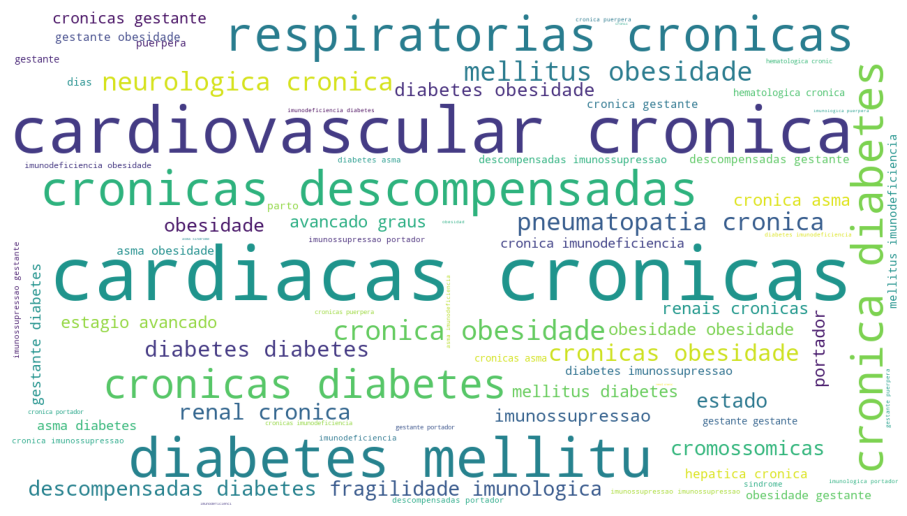

In [36]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1280,                            
                      height=720).generate(all_words_conditions)

fig, ax = plt.subplots(figsize=(16,10))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()

plt.imshow(wordcloud)                 
wordcloud.to_file('imgs/condicoes.png',);

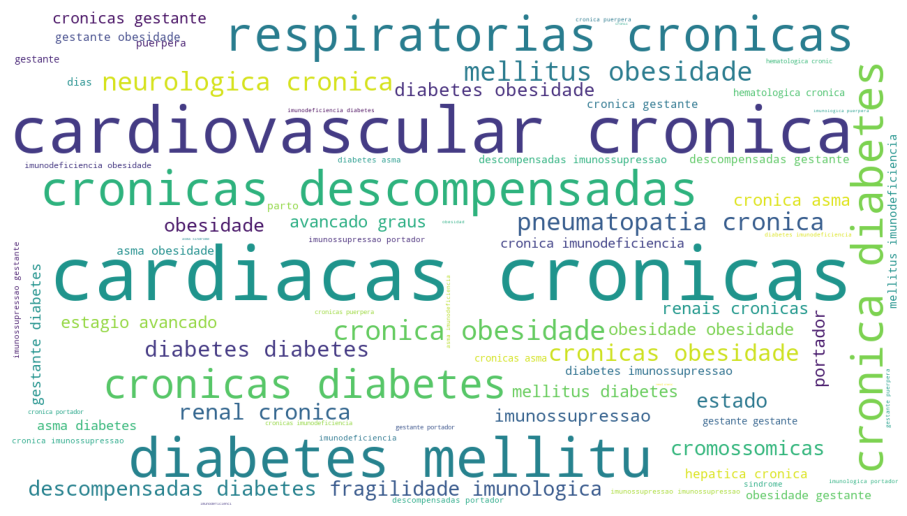

In [37]:
 # raca
wordcloud_ = WordCloud(stopwords=stopwords_,
                      background_color='white', width=1280,                            
                      height=720).generate(all_words_conditions_)

fig, ax = plt.subplots(figsize=(16,10))            
ax.imshow(wordcloud_, interpolation='bilinear')       
ax.set_axis_off()

plt.imshow(wordcloud) 

#### 3.1.6 Visualizar as top 50 tuplas de palavras

In [38]:
word_freq = WordCloud().process_text(all_words_conditions)
dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:50])

{'doencas cardiacas': 22488,
 'cardiacas cronicas': 22488,
 'doenca cardiovascular': 16981,
 'cardiovascular cronica': 16981,
 'cronicas doenca': 12092,
 'diabetes mellitu': 11648,
 'cronicas descompensadas': 8742,
 'doencas respiratorias': 8741,
 'respiratorias cronicas': 8741,
 'outros doenca': 8369,
 'cronica diabetes': 7300,
 'diabetes doenca': 7078,
 'cronicas diabetes': 6041,
 'cronica doenca': 6030,
 'descompensadas doenca': 5827,
 'obesidade doenca': 4761,
 'cronica outro': 4634,
 'mellitus doenca': 3824,
 'mellitus outro': 3640,
 'obesidade outro': 2999,
 'outros diabetes': 2775,
 'mellitus obesidade': 2148,
 'doenca neurologica': 2003,
 'neurologica cronica': 1995,
 'outros outros': 1854,
 'outra pneumatopatia': 1807,
 'pneumatopatia cronica': 1799,
 'gestante doenca': 1636,
 'cronicas obesidade': 1549,
 'doenca renal': 1440,
 'renal cronica': 1429,
 'diabetes diabetes': 1372,
 'obesidade diabetes': 1352,
 'outros obesidade': 1309,
 'descompensadas diabetes': 1260,
 'portador

In [39]:
word_freq_ = WordCloud().process_text(all_words_conditions_)
dict(sorted(word_freq_.items(), key=lambda item: item[1], reverse=True)[:50])

{'doencas cardiacas': 22488,
 'cardiacas cronicas': 22488,
 'doenca cardiovascular': 16981,
 'cardiovascular cronica': 16981,
 'cronicas doenca': 12092,
 'diabetes mellitu': 11648,
 'cronicas descompensadas': 8742,
 'doencas respiratorias': 8741,
 'respiratorias cronicas': 8741,
 'outros doenca': 8369,
 'cronica diabetes': 7300,
 'diabetes doenca': 7078,
 'cronicas diabetes': 6041,
 'cronica doenca': 6030,
 'descompensadas doenca': 5827,
 'obesidade doenca': 4761,
 'cronica outro': 4634,
 'mellitus doenca': 3824,
 'mellitus outro': 3640,
 'obesidade outro': 2999,
 'outros diabetes': 2775,
 'mellitus obesidade': 2148,
 'doenca neurologica': 2003,
 'neurologica cronica': 1995,
 'outros outros': 1854,
 'outra pneumatopatia': 1807,
 'pneumatopatia cronica': 1799,
 'gestante doenca': 1636,
 'cronicas obesidade': 1549,
 'doenca renal': 1440,
 'renal cronica': 1429,
 'diabetes diabetes': 1372,
 'obesidade diabetes': 1352,
 'outros obesidade': 1309,
 'descompensadas diabetes': 1260,
 'portador

### 3.2 Extração de novas *features*

Com a análise do campo textual, podemos visualizar algumas condições das quais podemos extrair. Devemos nos atentar para sinônimos, como 'doença cardíada' e 'doença cardiovascular', 'mellitus' ou 'diabetes. Outro ponto importante a se notar, são erros de digitação, como 'mellitu' ou 'asm', ou 'pneumopatia' como 'pneumatopatia'

As doenças/condições que extrairemos a partir do campo `CONDICOES` são:

- `CARDIOPATIA` = Doença cardiovascular ou doença cardíaca crônicas
- `DIABETES` = Diabetes ou Mellitu
- `DOENCA_RESPIRATORIA` = Asma, pneumopatia ou doença pulmonar
- `PROBLEMA_RENAL` = Problemas renais
- `OBESIDADE` = Obeso
- `DOENCA_CROMOSSOMICA` = Sindrome de down

#### 3.2.1 Caixa baixa

Antes de extraírmos, vamos deixar os dados em caixa baixa, para facilitar a extração do conhecimento.

In [40]:
df['CONDICOES'] = df['CONDICOES'].apply(lambda x: str.lower(x) if not isinstance(x, float) else np.nan) # deixando caixa baixa

In [41]:
# raca
df_['CONDICOES'] = df_['CONDICOES'].apply(lambda x: str.lower(x) if not isinstance(x, float) else np.nan) # deixando caixa baixa

#### 3.2.2 Extração

In [42]:
df['CARDIOPATIA'] = ['SIM' if any(string in str(row) for string in ['cardiovascular', 'cardiacas']) else 
                        'NAO' for row in df['CONDICOES']]

df['DIABETES'] = ['SIM' if any(string in str(row) for string in ['diabetes', 'mellitus', 'mellitu']) else 
                  'NAO' for row in df['CONDICOES']]

df['DOENCA_RESPIRATORIA'] = ['SIM' if any(string in str(row) for string in ['respiratorias', 'asma', 'asm', 'pneumopatia', 'pneumatopatia']) else 
                         'NAO' for row in df['CONDICOES']]

df['PROBLEMA_RENAL'] = ['SIM' if any(string in str(row) for string in ['renais', 'renal']) else 
                      'NÃO' for row in df['CONDICOES']]

df['OBESIDADE'] = ['SIM' if any(string in str(row) for string in ['obesidade', 'obesidad']) else 
                   'NAO' for row in df['CONDICOES']]

df['DOENCA_CROMOSSOMICA'] = ['SIM' if any(string in str(row) for string in ['cromossomicas', 'down']) else 
                  'NAO' for row in df['CONDICOES']]

# corrigir o campo de gestante
df['GESTANTE'] = ['SIM' if any(string in str(row) for string in ['gestante']) else 
                  gestante for row, gestante in zip(df['CONDICOES'], df['GESTANTE'])]

In [43]:
# raca
df_['CARDIOPATIA'] = ['SIM' if any(string in str(row) for string in ['cardiovascular', 'cardiacas']) else 
                        'NAO' for row in df_['CONDICOES']]

df_['DIABETES'] = ['SIM' if any(string in str(row) for string in ['diabetes', 'mellitus', 'mellitu']) else 
                  'NAO' for row in df_['CONDICOES']]

df_['DOENCA_RESPIRATORIA'] = ['SIM' if any(string in str(row) for string in ['respiratorias', 'asma', 'asm', 'pneumopatia', 'pneumatopatia']) else 
                         'NAO' for row in df_['CONDICOES']]

df_['PROBLEMA_RENAL'] = ['SIM' if any(string in str(row) for string in ['renais', 'renal']) else 
                      'NÃO' for row in df_['CONDICOES']]

df_['OBESIDADE'] = ['SIM' if any(string in str(row) for string in ['obesidade', 'obesidad']) else 
                   'NAO' for row in df_['CONDICOES']]

df_['DOENCA_CROMOSSOMICA'] = ['SIM' if any(string in str(row) for string in ['cromossomicas', 'down']) else 
                  'NAO' for row in df_['CONDICOES']]

# corrigir o campo de gestante
df_['GESTANTE'] = ['SIM' if any(string in str(row) for string in ['gestante']) else 
                  gestante for row, gestante in zip(df_['CONDICOES'], df_['GESTANTE'])]

#### 3.2.3 Remoção dos atributos que já foram processados

In [44]:
# nao precisamos mais das condicoes, nem do hospitalizado
df.drop(columns=['CONDICOES', 'HOSPITALIZADO', 'CRITERIO'], inplace=True) 
df.columns

Index(['SEXO', 'FAIXAETARIA', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'SRAG', 'CARDIOPATIA', 'DIABETES',
       'DOENCA_RESPIRATORIA', 'PROBLEMA_RENAL', 'OBESIDADE',
       'DOENCA_CROMOSSOMICA'],
      dtype='object')

In [45]:
# raca
# nao precisamos mais das condicoes, nem do hospitalizado
df_.drop(columns=['CONDICOES', 'HOSPITALIZADO', 'CRITERIO'], inplace=True) 
df_.columns

Index(['SEXO', 'FAIXAETARIA', 'EVOLUCAO', 'FEBRE', 'TOSSE', 'GARGANTA',
       'DISPNEIA', 'GESTANTE', 'RACA_COR', 'SRAG', 'CARDIOPATIA', 'DIABETES',
       'DOENCA_RESPIRATORIA', 'PROBLEMA_RENAL', 'OBESIDADE',
       'DOENCA_CROMOSSOMICA'],
      dtype='object')

___

## 4. Redução de dimensionalidade

Não aplicaremos redução de dimensionalidade e afins, pois queremos manter uma boa interpretabilidade.


In [46]:
# salvar no disco

df.to_csv("files/covid_2021_cleaned.csv", sep=';', index=False)
df_.to_csv("files/covid_2021_cleaned_raca.csv", sep=';', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad6f6ae1-4103-4b0d-873e-7643398d0093' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>